In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### BeautifulSoup
    BeautifulSoup(이하 bs)은 HTML과 XML문서를 파싱하기 위한 파이썬 라이브러리
    
    bs parser를 사용해서 html 문서 내 태그를 구조화 하고 파이썬 객체로 만들어
    원하는 태그를 찾을 수 있도록 도와준다.
    
    bs 라이브러리는 외부라이브러리이기 때문에 사용하기 위해서는 설치해야한다.
    하지만 아나콘다에는 이미 설치가 되어 있다.

In [2]:
# 이미 설치돼 있음
!pip install beautifulsoup4

#### 1. 네이버 URL 정보를 가져옴 - request.get()

'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한
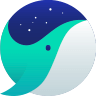
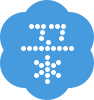

In [3]:
import requests
from bs4 import BeautifulSoup as bs

req = requests.get("https://naver.com") # 네이버 url 정보를 가져온다.
html = req.text
html

#### 2. bs를 이용해 파싱함

bs4.BeautifulSoup

<bound method Tag.prettify of 
<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한
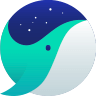
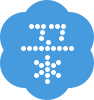

In [4]:
soup = bs(html, 'html.parser') # bs를 이용해 html.parser로 파싱
# soup
type(soup)
soup.prettify

#### 3. bs find() 단수, find_all() 복수

In [5]:
result = soup.find_all('a', 'thumb')
result

[<a class="thumb" href="#">
 <img alt="아이뉴스24" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/031.png"/>
 <span class="thumb_dim"></span></a>,
 <a class="thumb" href="#">
 <img alt="매일경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/009.png"/>
 <span class="thumb_dim"></span></a>,
 <a class="thumb" href="#">
 <img alt="조선일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2020/0903/nsd185255316.png"/>
 <span class="thumb_dim"></span></a>,
 <a class="thumb" href="#">
 <img alt="경향신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/032.png"/>
 <span class="thumb_dim"></span></a>,
 <a class="thumb" href="#">
 <img alt="일간스포츠" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/241.png"/>
 <span class="thumb_dim"></span></a>,
 <a class="thumb" href="#">
 <img alt="미디어오늘" class

In [6]:
news_list = []
for x in result:
    news_list.append(x.find('img')['alt'])
news_list

['아이뉴스24',
 '매일경제',
 '조선일보',
 '경향신문',
 '일간스포츠',
 '미디어오늘',
 '전자신문',
 '블로터',
 '스포탈코리아',
 '뉴시스',
 '뉴스타파',
 '프레시안',
 '스포츠조선',
 '머니투데이',
 '한국경제TV',
 '경기일보',
 '경인일보',
 '기호일보',
 '한국금융신문',
 '농민신문',
 '맥스무비',
 '에너지경제',
 'YONHAPNEWS',
 '시사저널']

In [7]:
soup.title
soup.title.name
soup.title.string
soup.title.text

# 태그가 여러 개 있어도 첫번째 태그만 가져온다...주의
soup.img
soup.img['height']

<title>NAVER</title>

'title'

'NAVER'

'NAVER'

<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px" width="303"/>

'49'

In [8]:
import re # 정규 표현식 사용
soup.find_all(string=re.compile("네이버"))

['네이버',
 '네이버를 시작페이지로',
 '쥬니어네이버',
 '네이버뉴스',
 '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.',
 '네이버 여행플러스',
 '네이버 여행플러스',
 '네이버 여행플러스',
 '네이버 여행플러스',
 '네이버 여행플러스',
 '네이버 여행플러스',
 '네이버 여행플러스',
 "'새로 오픈했어요' 검색창에서 찾은 서울 핫플레이스 4이제 막 문을 연 장소들은 확실히 한적하다. 그래서일까. 멀리 떠나온 기분을 느낄 수 있다. 네이버 검색창을 샅샅이 뒤져 찾은 신상 핫플레이스를 소개한다. 글 / 디자인 = 정미진 여행+ 디자이너",
 '네이버 여행플러스',
 "[안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요.",
 '네이버 개발자 센터',
 '네이버 D2',
 '네이버 D2SF',
 '네이버 랩스',
 '네이버 정책 및 약관',
 '네이버 정책']

#### bs select_one(), select
    find(), find_all() --- 태그 기반 검색
    select_one(), select() --- 선택자 기반 검색

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/details/darkmode?=main&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-clk="top.
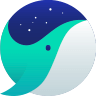
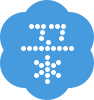

In [9]:
soup.select_one('a')
soup.select('a')
# 이 부분만 보면 find(), find_all() 함수와 별 다른 차이점이 없어보인다.

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/details/darkmode?=main&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-clk="top.
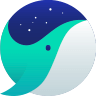
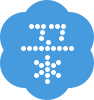

[<ul class="kwd_lst _recent">
 <!-- 최근검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>
 </a>
 <span class="etc">
 <em class="date">@date@.</em>
 <!-- [AU] _del 클래스를 추가해주세요. -->
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>
 </span>
 </li>
 </ul>,
 <ul class="kwd_lst _kwd_list">
 <!-- [AU] 자동완성 검색어 템플릿 -->
 <!-- [AU] _item 클래스를 추가해주세요. -->
 <!-- [AU] data-rank="@rank@" data-template-type="suggestion" data-keyword="@in_txt@" attribute를 추가해주세요. -->
 <li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="suggestion">
 <a class="kwd" href="#">
 <span class="fix"><span class="common_ico_kwd"

In [10]:
# css 선택자 사용하는 기법 그대로 사용
body = soup.select('body a')
body

ul = soup.select('div>ul')
ul

#### bs get_text(), get()
    get_text() --- 검색 결과에서 태그를 제외한 텍스트만 가져옴
    get('속성') --- 해당 속성의 값만 가져옴
    string() --- 검색 결과에서 태그 안의 또 다른 태그가 없는 경우에만 내용 출력

In [11]:
text = soup.find('span', attrs={'class': 'blind'})
text
text.get_text()
text.get('class')

<span class="blind">NAVER whale</span>

'NAVER whale'

['blind']

#### bs사용해서 네이버 영화 랭킹 가져오기
    1. 네이버 영화 랭킹 홈페이지 접속 url, text 가져오기
       https://movie.naver.com/movie/sdb/rank/rmovie.nhn
    2. 분석작업을 하기 위해 soup(bs객체)을 만들고 html파서로 파싱
    3. 리턴된 soup을 분석한 결과로 영화 랭킹을 찾아서 출력
       select() 또는 find_all()

In [12]:
req = requests.get("https://movie.naver.com/movie/sdb/rank/rmovie.nhn")
req

html = req.text
# html

soup = bs(html, 'html.parser')
soup.prettify

<Response [200]>

<bound method Tag.prettify of 
<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author

In [13]:
movie_ranking_list = soup.find_all('div', class_='tit3')
for i in range(len(movie_ranking_list)):
    print(f"{i + 1:2}위 : {movie_ranking_list[i].get_text().strip()}")

 1위 : 스파이럴
 2위 : 더 스파이
 3위 : 분노의 질주: 더 얼티메이트
 4위 : 크루즈 패밀리: 뉴 에이지
 5위 : 비와 당신의 이야기
 6위 : 극장판 귀멸의 칼날: 무한열차편
 7위 : 내가 죽기를 바라는 자들
 8위 : 아들의 이름으로
 9위 : 내일의 기억
10위 : 미나리
11위 : 내겐 너무 소중한 너
12위 : 노매드랜드
13위 : 보이저스
14위 : 명탐정 코난: 비색의 탄환
15위 : 자산어보
16위 : 링: 더 라스트 챕터
17위 : 아이들은 즐겁다
18위 : 키퍼스
19위 : 어른들은 몰라요
20위 : 혼자 사는 사람들
21위 : 극장판 콩순이: 장난감나라 대모험
22위 : 슈퍼노바
23위 : 해리 포터와 아즈카반의 죄수
24위 : 도라에몽: 스탠바이미 2
25위 : 범털2 : 쩐의 전쟁
26위 : 빅 피쉬
27위 : 크루엘라
28위 : 노바디
29위 : 학교 가는 길
30위 : 미스
31위 : 파이터
32위 : 비커밍 아스트리드
33위 : 파이프라인
34위 : 낙원의 밤
35위 : 베놈 2: 렛 데어 비 카니지
36위 : 소울
37위 : 콰이어트 플레이스 2
38위 : 8년을 뛰어넘은 신부
39위 : 더 파더
40위 : 그린 북
41위 : 카오스 워킹
42위 : 2067
43위 : 잭 스나이더의 저스티스 리그
44위 : 블랙 위도우
45위 : 500일의 썸머
46위 : 모탈 컴뱃
47위 : 컨저링 3: 악마가 시켰다
48위 : 스쿨 오브 락(樂)
49위 : 서복
50위 : 고질라 VS. 콩
